In [265]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy as sp
from sklearn.decomposition import PCA

In [266]:
np.random.default_rng(1234)

Generator(PCG64) at 0x2E29CFAE0

In [267]:
dim = [100,500,1000,2000,4000,6000,8000,10000]
#dim = [10,15,20,25,30,35,40,45]
n = 15
current_mean = [np.squeeze(np.array([0] * (int(dim[0]*.9)) + [1] * int((dim[0]*.1))))]
cov = np.identity(dim[0]) 
samples = [np.random.multivariate_normal(current_mean[0] ,cov, n)]
for j in range(1,8):
    previous_samples = samples[j-1]
    current_mean.append(np.array([0] * int((dim[j]-dim[j-1])*.9) + [1] * int((dim[j]-dim[j-1])*.1)))
    current_cov = np.identity(dim[j]-dim[j-1])
    samples.append(np.concatenate([previous_samples,np.random.multivariate_normal(current_mean[j] , current_cov, n)],axis=1))


In [268]:
pca = PCA(n_components = 4)
pca_fit = [pca.fit(samples[i]) for i in range(8)]

In [269]:
print("Explained Variance Ratio Across All Dimensions: {}".format([(pca_fit[i].explained_variance_ratio_) for i in range(8)]))
print("First Four Principal Component Across All Dimensions: {}".format([(pca_fit[i].singular_values_ )for i in range(8)]))

Explained Variance Ratio Across All Dimensions: [array([0.07614016, 0.07529155, 0.0749626 , 0.07427206]), array([0.07614016, 0.07529155, 0.0749626 , 0.07427206]), array([0.07614016, 0.07529155, 0.0749626 , 0.07427206]), array([0.07614016, 0.07529155, 0.0749626 , 0.07427206]), array([0.07614016, 0.07529155, 0.0749626 , 0.07427206]), array([0.07614016, 0.07529155, 0.0749626 , 0.07427206]), array([0.07614016, 0.07529155, 0.0749626 , 0.07427206]), array([0.07614016, 0.07529155, 0.0749626 , 0.07427206])]
First Four Principal Component Across All Dimensions: [array([103.19617316, 102.61948381, 102.39505953, 101.92235181]), array([103.19617316, 102.61948381, 102.39505953, 101.92235181]), array([103.19617316, 102.61948381, 102.39505953, 101.92235181]), array([103.19617316, 102.61948381, 102.39505953, 101.92235181]), array([103.19617316, 102.61948381, 102.39505953, 101.92235181]), array([103.19617316, 102.61948381, 102.39505953, 101.92235181]), array([103.19617316, 102.61948381, 102.39505953, 1

In [270]:
pca_fit_data = np.array([pca.fit_transform(samples[i]) for i in range(8)])

In [271]:
np.array(pca_fit_data).T.shape

(4, 15, 8)

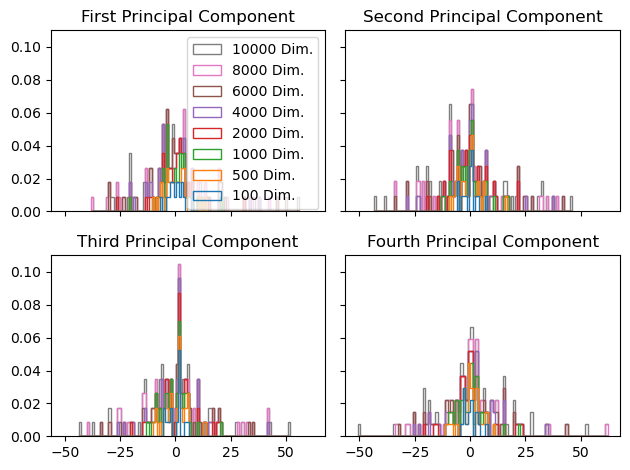

In [272]:

n_bins = 100

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)

ax0.hist(pca_fit_data.T[0,:,:],
         n_bins,
         histtype='step',
         density = True,
         stacked=True,
         fill=False,
         label = ["{} Dim.".format(dim[0]),
                  "{} Dim.".format(dim[1]),
                  "{} Dim.".format(dim[2]),
                  "{} Dim.".format(dim[3]),
                  "{} Dim.".format(dim[4]),
                  "{} Dim.".format(dim[5]),
                  "{} Dim.".format(dim[6]),
                  "{} Dim.".format(dim[7])])
ax0.set_title('First Principal Component')
ax0.legend()


ax1.hist(pca_fit_data.T[1,:,:], n_bins, histtype='step', density = True, stacked=True, fill=False)
ax1.set_title('Second Principal Component')

ax2.hist(pca_fit_data.T[2,:,:], n_bins, histtype='step', density = True, stacked=True, fill=False)
ax2.set_title('Third Principal Component')

# Make a multiple-histogram of data-sets with different length.
ax3.hist(pca_fit_data.T[3,:,:], n_bins, histtype='step', density = True, stacked=True, fill=False)
ax3.set_title('Fourth Principal Component')

fig.tight_layout()
plt.show()

In [277]:
test_of_means = [sp.stats.ttest_1samp(samples[i], 0,alternative='greater') for i in range(8)]

In [274]:
full_means = current_mean
interim = current_mean
for j in range(1,8):
    full_means[j] = np.concatenate([current_mean[j-1],interim[j]])

In [278]:
FPR = [np.sum(np.array(test_of_means[i].pvalue<.05).astype(float)*np.array(full_means[i]==0).astype(float))/(np.sum(np.array(full_means[i]==0).astype(float))) for i in range(8)]
TPR = [np.sum(np.array(test_of_means[i].pvalue<.05).astype(float)*np.array(full_means[i]>0).astype(float))/(np.sum(np.array(full_means[i]>0).astype(float))) for i in range(8)]
FNR = [np.sum(np.array(test_of_means[i].pvalue>=.05).astype(float)*np.array(full_means[i]>0).astype(float))/(np.sum(np.array(full_means[i]>0).astype(float))) for i in range(8)]
TNR = [np.sum(np.array(test_of_means[i].pvalue>=.05).astype(float)*np.array(full_means[i]==0).astype(float))/(np.sum(np.array(full_means[i]==0).astype(float))) for i in range(8)]
FDR = [np.sum(np.array(test_of_means[i].pvalue<.05).astype(float)*np.array(full_means[i]==0).astype(float))/(np.sum(np.array(test_of_means[i].pvalue<.05).astype(float))) for i in range(8)]

In [308]:
print("FPR: {}".format(FPR))
print("TPR: {}".format(TPR))
print("FNR: {}".format(FNR))
print("TNR: {}".format(TNR))
print("FDR: {}".format(FDR))

FPR: [0.06666666666666667, 0.04888888888888889, 0.051111111111111114, 0.050555555555555555, 0.04972222222222222, 0.049074074074074076, 0.050416666666666665, 0.052]
TPR: [1.0, 0.98, 0.99, 0.985, 0.9825, 0.985, 0.9825, 0.981]
FNR: [0.0, 0.02, 0.01, 0.015, 0.0175, 0.015, 0.0175, 0.019]
TNR: [0.9333333333333333, 0.9511111111111111, 0.9488888888888889, 0.9494444444444444, 0.9502777777777778, 0.950925925925926, 0.9495833333333333, 0.948]
FDR: [0.375, 0.30985915492957744, 0.31724137931034485, 0.3159722222222222, 0.3129370629370629, 0.30957943925233644, 0.31592689295039167, 0.32298136645962733]


In [296]:
sig_0 = np.array(100).astype(float)
mu_0 = np.array(0).astype(float)


In [299]:
mu_post = [(1/(1/sig_0 + n))*sum(samples[i],0) for i in range(8)]
sig_post = 1/(1/sig_0 + n)


In [301]:
posterior_cdf_values = [sp.stats.norm.cdf(0,mu_post[i],np.sqrt(sig_post)) for i in range(8)]

In [304]:
FPR_Bayes = [np.sum(np.array(posterior_cdf_values[i]<.05).astype(float)*np.array(full_means[i]==0).astype(float))/(np.sum(np.array(full_means[i]==0).astype(float))) for i in range(8)]
TPR_Bayes = [np.sum(np.array(posterior_cdf_values[i]<.05).astype(float)*np.array(full_means[i]>0).astype(float))/(np.sum(np.array(full_means[i]>0).astype(float))) for i in range(8)]
FNR_Bayes = [np.sum(np.array(posterior_cdf_values[i]<.05).astype(float)*np.array(full_means[i]>0).astype(float))/(np.sum(np.array(full_means[i]>0).astype(float))) for i in range(8)]
TNR_Bayes = [np.sum(np.array(posterior_cdf_values[i]<.05).astype(float)*np.array(full_means[i]==0).astype(float))/(np.sum(np.array(full_means[i]==0).astype(float))) for i in range(8)]
FDR_Bayes = [np.sum(np.array(posterior_cdf_values[i]<.05).astype(float)*np.array(full_means[i]==0).astype(float))/(np.sum(np.array(posterior_cdf_values[i]<.05).astype(float))) for i in range(8)]

In [306]:
print("FPR: {}".format(FPR))
print("FPR Bayes: {}".format(FPR_Bayes))
print("TPR: {}".format(TPR))
print("TPR Bayes: {}".format(TPR_Bayes))
print("FNR: {}".format(FNR))
print("FNR Bayes: {}".format(FNR_Bayes))
print("TNR: {}".format(TNR))
print("TNR Bayes: {}".format(TNR_Bayes))
print("FDR: {}".format(FDR))
print("FDR Bayes: {}".format(FDR_Bayes))

FPR: [0.06666666666666667, 0.04888888888888889, 0.051111111111111114, 0.050555555555555555, 0.04972222222222222, 0.049074074074074076, 0.050416666666666665, 0.052]
FPR Bayes: [0.044444444444444446, 0.04888888888888889, 0.05444444444444444, 0.04888888888888889, 0.050555555555555555, 0.04833333333333333, 0.049166666666666664, 0.050333333333333334]
TPR: [1.0, 0.98, 0.99, 0.985, 0.9825, 0.985, 0.9825, 0.981]
TPR Bayes: [1.0, 1.0, 1.0, 0.99, 0.9925, 0.9916666666666667, 0.9875, 0.988]
FNR: [0.0, 0.02, 0.01, 0.015, 0.0175, 0.015, 0.0175, 0.019]
FNR Bayes: [1.0, 1.0, 1.0, 0.99, 0.9925, 0.9916666666666667, 0.9875, 0.988]
TNR: [0.9333333333333333, 0.9511111111111111, 0.9488888888888889, 0.9494444444444444, 0.9502777777777778, 0.950925925925926, 0.9495833333333333, 0.948]
TNR Bayes: [0.044444444444444446, 0.04888888888888889, 0.05444444444444444, 0.04888888888888889, 0.050555555555555555, 0.04833333333333333, 0.049166666666666664, 0.050333333333333334]
FDR: [0.375, 0.30985915492957744, 0.31724137